In [2]:
# Get filenames in list  (we extract only the filenames not the files itself)

from os import listdir
from os.path import isfile, join

mypath = "cats_dogs/datasets/catsvsdogs/images/"

file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(str(len(file_names)) + ' images loaded')

#listdir returns the filenames inside the path (returns a list)
#is file returns True if path is an existing file
#join combines a path with a name (os library not string)
#f for f in .. is like a normal for which adds element to a list
#1st f takes a value f from the list like a normal for
#2nd we execute the if statement
#3rd if if returns true f is added to the list

3002 images loaded


In [4]:
import cv2
import numpy as np
import sys
import os
import shutil

# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0  #used as counter inside if later, in order to count how many pictures we added
cat_count = 0
training_size = 1201
test_size = 300
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150  #size of our reshaped image 150x150
dog_dir_train = "cats_dogs/datasets/train/dogs/"
cat_dir_train = "cats_dogs/datasets/train/cats/"
dog_dir_val = "cats_dogs/datasets/validation/dogs/"
cat_dir_val = "cats_dogs/datasets/validation/cats/"

#print(os.path.exists(cat_dir_val)) false since the path doesnt exist

def make_dir(directory):
        if os.path.exists(directory):#returns true if the path exists
            shutil.rmtree(directory)#deletes the directory/folder and all the files inside
        os.makedirs(directory)#makes a directory/folder at the given path

make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

def getZeros(number):  #returns zeroes given the number #we are trying to have the same number of digits(3) 1 number 2 zeroes 2 numbers one zeroes 3 numbers no zeroes
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

for i, file in enumerate(file_names): #returns the counter and the name from the file_names (first value of counter is 0)
    
    if file_names[i][0] == "d": #first[] corresponds to the file name second[0] corresponds to the first letter of the string
        dog_count += 1
        image = cv2.imread(mypath+file) #reads the image
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if dog_count <= training_size:
            training_images.append(image) #we create our dogs list
            training_labels.append(1)     #we create the labels 1=dogs
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image) #we write the image in the new file
        if dog_count > training_size and dog_count <= training_size+test_size: #we create the test size
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1201) #we want our test images to start from zero and since all images above 1201 are test we subtract that number
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1201) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1201)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1201) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size: #not needed
        break

print("Training and Test Data Extraction Complete")

False
Training and Test Data Extraction Complete


In [5]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

In [ ]:
# Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

In [22]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Input
from keras.utils import to_categorical
from keras.utils import np_utils

from glob import glob

['cats_dogs/datasets/train\\cats\\cat001.jpg', 'cats_dogs/datasets/train\\cats\\cat002.jpg', 'cats_dogs/datasets/train\\cats\\cat003.jpg', 'cats_dogs/datasets/train\\cats\\cat004.jpg', 'cats_dogs/datasets/train\\cats\\cat005.jpg']
2402
600


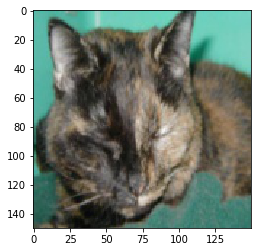

In [28]:
#Image Information
image_size = [150,150]

#Training Information
epochs = 5
batch_size = 32

train_path = "cats_dogs/datasets/train"
valid_path = "cats_dogs/datasets/validation"
#print(train_path)

#glob returns a list with the file names(their path too) present on the path * this(*) can be used in order to extract the number of training examples
image_file_names = glob(train_path + '/*/*.jp*g') #*works like an autocomplete first one is for the class name second is for the picture names and the third is in order to extract both jpg and jpeg
valid_image_file_names = glob(valid_path + "/*/*.jp*g")

folders = glob(train_path + '/*') #returns a list with the folder names. These names are the names of the different classes *this way we can find the number of classes we have
print(image_file_names[0:5]) #they contain the whole file path until the image
print(len(image_file_names))
print(len(valid_image_file_names))

#show an image
plt.imshow(image.load_img(np.random.choice(image_file_names)))
plt.show()

In [7]:
#Image Data Generators are used for data augmentations

# gen is like a class 
gen = ImageDataGenerator(
  rotation_range=45,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255) #its good to check for the max value not insert it manually
#fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

In [13]:
# get label mapping for confusion matrix plot later 
test_gen = gen.flow_from_directory(valid_path, target_size=image_size)  #we define the directory where it will extract its data 
print(test_gen.class_indices) #returns the class labels and their corresponding number

labels = [None] * len(test_gen.class_indices)  #[1]*2 -->[1 1] same happens for None
print(len(labels))
for k, v in test_gen.class_indices.items():  #items --> (class name, class number)
  labels[v] = k #we input the number in labels and get the output

Found 600 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
2


In [15]:
print(test_gen.class_indices) #class_indices is a dictionary, contains the class names and their numbers(encoding)
print(test_gen.class_indices.items())#items --> (class name, class number)
#print(test_gen.class_indices.items()[0]) error #need to be extracted with for like the labels above
print(type(test_gen.class_indices))
print(type(test_gen.class_indices.items()))

{'cats': 0, 'dogs': 1}
dict_items([('cats', 0), ('dogs', 1)])
<class 'dict'>
<class 'dict_items'>


(32, 150, 150, 3)
(32, 2)
(150, 150, 3)
min: 0.003461036 max: 1.0


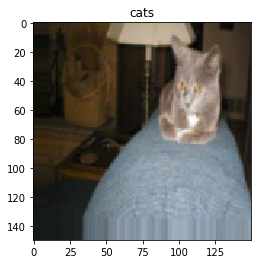

In [16]:
for x, y in test_gen: #test_gen returns tupples x--> input data y-->label it is a generator
  print(x.shape)  #tr examples=batch size, height,width, channels
  print(y.shape)  #2=no of classes
  print(x[0].shape) #one image
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])]) #labels was created by us and it contains the class name in the corresponding position (number)
  plt.imshow(x[0])
  plt.show()
  break

<class 'numpy.ndarray'>
(32, 150, 150, 3)
(32, 2)
(150, 150, 3)
[1. 0.]


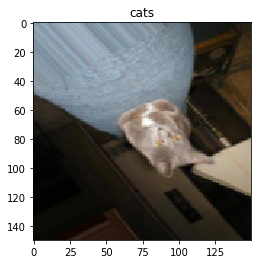

In [18]:
temp2,templabel = test_gen[0]  #test_gen returns a tupple with contains the data and the corresponding label (its number)
print(type(temp2))
print(temp2.shape)
print(templabel.shape) #32 is the default batch size, each time the generator sends a batch of 32(default)
print(temp2[0].shape) #we extract the first photo
print(templabel[0]) #we have one hot encoding
plt.title(labels[np.argmax(templabel[0])]) #labels was created by us and it contains the class name in the corresponding position (number)
plt.imshow(temp2[0])
plt.show()

In [19]:
#We create the generators that will be used to data augment and preprocess our data

train_generator = gen.flow_from_directory( # It should contain one subdirectory per class  the labels for each data are created from the subfolder name
  train_path, #it will extract all the data from here, doesnt matter if they are inside the folders
  target_size=image_size, #height width
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=image_size, #height width
  shuffle=True,
  batch_size=batch_size,
)

Found 2402 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [25]:
#Model Architecture 
image_size = [150,150,3]
no_classes = 2 #or len(folders)
i = Input(shape=(image_size[0], image_size[1], image_size[2])) #We define the input shape #height x width X depth #We could have used input_shape

#Convolutional Layers
x = Conv2D(filters=32, kernel_size=(3,3), padding="same")(i) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#150x150x3 --> 150x150x32 --> 75x175x32
x = Conv2D(filters=64, kernel_size=(3,3), padding="same")(x) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#75x16x32 --> 75x75x64 --> 38x38x64
x = Conv2D(filters=128, kernel_size=(3,3), padding="same")(x) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#38x38x64 --> 38x38x128 --> 19x19x128 
x = Conv2D(filters=256, kernel_size=(3,3), padding="same")(x) #default padding is valid
x = BatchNormalization()(x) #Batch Norm is added after the convolution operation and before the  ReLU
x = Activation("relu")(x)
x = MaxPooling2D(padding="same")(x) #default values are strides = 2 and filter dimensions = 2 
#19x19x129 --> 19x19x256 --> 10x10x256

#Flattening
x = Flatten()(x) #10x10x256=25600 features  dim = (-1,25600)

#Fully Connected Layers
x = Dense(units=400)(x) #128 neurons
x = Activation('relu')(x)
x = Dropout(0.5)(x)#Dropout probability to drop a neuron #Dropout is added after the activation
x = Dense(units=128)(x) #128 neurons
x = Activation('relu')(x)
x = Dropout(0.5)(x)#Dropout probability to drop a neuron #Dropout is added after the activation
x = Dense(units=no_classes)(x)#Where k is the no classes
x = Activation('softmax')(x)#Here on the contrary with tensorflow we have to manually add the softmax layer


#Compile the model
model = Model(inputs = i, outputs=x ) #we need to define the input and the output of the model

#Model Architecture Visualization

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_12 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 75, 75, 64)        256       
__________

In [26]:
#We compile our model

model.compile(loss='categorical_crossentropy', #needs one hot encoding
             optimizer ="adam",
             metrics = ["accuracy"])

In [27]:
#fit  #keras has a special fit function that takes as an input the generators
                                                                                                                     
r = model.fit_generator(train_generator, validation_data = valid_generator, epochs = epochs,
                        steps_per_epoch = len(image_file_names)//batch_size, #// rounds the result
                        validation_steps = len(valid_image_file_names)//batch_size,
                       )
# r contains the results not the model itself

Epoch 1/5
75/75 [==============================] - 16s 215ms/step - loss: 7.9083 - acc: 0.4883 - val_loss: 8.0870 - val_acc: 0.4983
Epoch 2/5
75/75 [==============================] - 17s 230ms/step - loss: 7.5190 - acc: 0.5258 - val_loss: 6.4022 - val_acc: 0.5810
Epoch 3/5
75/75 [==============================] - 17s 228ms/step - loss: 7.9834 - acc: 0.4979 - val_loss: 8.1158 - val_acc: 0.4965
Epoch 4/5
75/75 [==============================] - 17s 221ms/step - loss: 8.2726 - acc: 0.4867 - val_loss: 8.0874 - val_acc: 0.4982
Epoch 5/5
75/75 [==============================] - 17s 222ms/step - loss: 8.0888 - acc: 0.4980 - val_loss: 8.1442 - val_acc: 0.4947


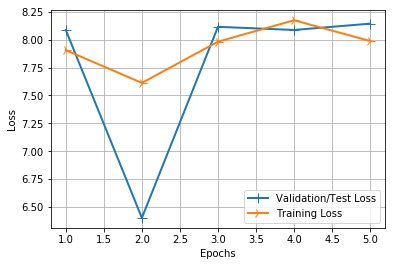

In [30]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = r.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

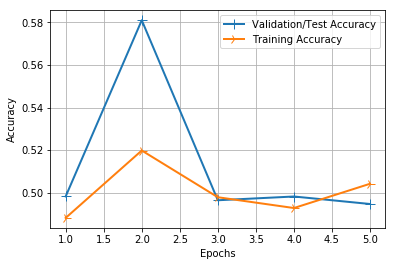

In [32]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = r.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()